# National Small Business Survey

In this piece, I explore the National Small Business Survey dataset I obtained from the [Data dot Ug](http://catalog.data.ug/dataset/national-small-business-survey-2015) website. This website is a repositiory of open data on Uganda and holds over 250 data sets and is regularly updated. It is a great data source for anyone willing to eplore data about Uganda.

I already downloaded this dataset and will navifgate to the folder to where I saved it. This dataset.


This file has a large number of columns. We shall read it into pandas and then explore and trim it into what we want to use. First we'll import someof the libraries we are sure to use.

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

In [4]:
sme = pd.read_csv('nsbs-data-2015-fsdu.csv')

The dataset has a large number of columns. We can look at the number of rows and columns below.

In [5]:
rows, columns = sme.shape
print 'Number of columns:' 
print columns

print 'Number of rows:'
print rows

Number of columns:
523
Number of rows:
1839


We can seee that there are 523 columns. We most definitely won't do our analysis with all those columns. We explore the various columns and choose the ones that are most relevant.

I narrowed down the number of rows considerably and created a file that I will now for analysis. I load this dataset into pandas to replace the original dataset and then show a preview of it.

In [6]:
sme= pd.read_csv('sme_data.csv')

In [7]:
sme.head()

,Interview number,SECTOR,REGION,DISTRICT,PARISH,Language,Role in Business,What is your role in the business?,Age of owner,Gender of owner,...,How long has the business been operating?,Legal status,What is the current legal status of the business? SINGLE ANSWER,Where business operates from,Where does the business mainly operate from? SINGLE ANSWER,Keeping all physical receipts in an organized manner,Book keeping for revenues (but not necessarily expenditures),Do full financials (Revenue and expense excluding tax accounting),4 Do full financials (Revenue and expense including tax accounting),Firms total sales
0,13.0,ACCOMODATION,NORTHERN,GULU,AGWEE,English,Owner,NaN,35-50,Female,...,5.0,Single owner/sole proprietorship,NaN,"Informal premises (e.g. informal market, stree...",NaN,Yes,Yes,0.0,0.0,500000.0
1,15.0,ACCOMODATION,NORTHERN,GULU,FOR GOD,English,Manager,NaN,35-50,Male,...,9.0,"Privately held, limited company",NaN,"Formal business premises (e.g. office, busines...",NaN,Yes,Yes,1.0,1.0,8000000.0
2,20.0,ACCOMODATION,NORTHERN,GULU,LABOUR LINE,English,Manager,NaN,35-50,Male,...,3.0,"Privately held, limited company",NaN,"Formal business premises (e.g. office, busines...",NaN,Yes,Yes,1.0,1.0,5000000.0
3,21.0,INFORMATION & COMMUNICATION,NORTHERN,GULU,QUEEN S AVENUE,English,Owner,NaN,35-50,Female,...,5.0,"Privately held, limited company",NaN,"Formal business premises (e.g. office, busines...",NaN,Yes,Yes,1.0,1.0,2000000.0
4,26.0,REAL ESTATE,WESTERN,HOIMA,CENTRAL WARD,English,Owner,NaN,35-50,Male,...,15.0,"Privately held, limited company",NaN,"Formal business premises (e.g. office, busines...",NaN,Yes,No,1.0,1.0,1000000.0


We can peek and have a look at the different columns and have general information like the data types of the values as well as the number non-null values.



In [8]:
sme.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1838 entries, 0 to 1837
Data columns (total 23 columns):
Interview number                                                       1322 non-null float64
SECTOR                                                                 1322 non-null object
REGION                                                                 1322 non-null object
DISTRICT                                                               1322 non-null object
PARISH                                                                 1322 non-null object
Language                                                               1322 non-null object
Role in Business                                                       1322 non-null object
What is your role in the business?                                     123 non-null object
Age of owner                                                           1322 non-null object
Gender of owner                                                  


We'll need to do some further data munging before we can use this data for analysis. For example some columns like 'Legal status' and 'What is the current legal status of the business? SINGLE ANSWER' have nearly the same information. The latter contains the answers the users gave when they chose 'Other' on the former rather than one of the choices.

The same applies to the columns 'Where business operates from' and 'Where does the business mainly operate from? SINGLE ANSWER'.

We also have a total of 1838 rows however from the above we see all the columns have no more than 1322 non-null values. In fact most rows have 1322 non-null values which seems to suggest that there are about 1322 non-null rows and the other are rows with null values.


In [9]:
sme['Legal status'].value_counts()

Single owner/sole proprietorship    969
Privately held, limited company     145
Partnership                         116
Co-operative                         38
0                                    27
Other (please specify)               19
Publicly listed company (PLC)         8
Name: Legal status, dtype: int64

In [10]:
sme['What is the current legal status of the business? SINGLE ANSWER'].value_counts()

0                                    27
Under the church                      2
Association of members                2
Ngo                                   2
Shareholding company.                 1
Church owned School                   1
NGO(Charity organisation              1
Community based business              1
Joint venture                         1
We have not registered in any way     1
Church founded                        1
started by government                 1
under the church                      1
Family owned                          1
Its an agency of nic                  1
under  government  supervision        1
NGo (church owned                     1
Name: What is the current legal status of the business? SINGLE ANSWER, dtype: int64

In [11]:
sme['What is the current legal status of the business? SINGLE ANSWER'].count()

46

We can see that outside the 27 rows that have a value of zero, the remaining 19 columns in the second columns correspond to the 19 in the first column for which the value is 'Other (please specify).' We can show this more clearly by selecting the two columns for which the value in the first column is 'Other (please specify)'.

In [12]:
legal = sme[['Legal status','What is the current legal status of the business? SINGLE ANSWER']]

In [13]:
legal[sme['Legal status']=='Other (please specify)']

,Legal status,What is the current legal status of the business? SINGLE ANSWER
153,Other (please specify),Association of members
162,Other (please specify),Association of members
882,Other (please specify),under the church
911,Other (please specify),Community based business
1001,Other (please specify),Church owned School
1049,Other (please specify),Under the church
1050,Other (please specify),Church founded
1052,Other (please specify),Under the church
1090,Other (please specify),started by government
1114,Other (please specify),Ngo


In [14]:
legal[sme['Legal status']=='Other (please specify)'].count()

Legal status                                                       19
What is the current legal status of the business? SINGLE ANSWER    19
dtype: int64

From the above we can see that the values of the second column can just be pplaced into the first one to replace the instances where the user chose 'Other'. We can embark on this.

In [15]:
index_other = legal[sme['Legal status']=='Other (please specify)'].index
sme['Legal status'].ix[index_other]= sme.ix[index_other]['What is the current legal status of the business? SINGLE ANSWER']

In [16]:
sme['Legal status'].value_counts()

Single owner/sole proprietorship     969
Privately held, limited company      145
Partnership                          116
Co-operative                          38
0                                     27
Publicly listed company (PLC)          8
Ngo                                    2
Under the church                       2
Association of members                 2
Community based business               1
NGo (church owned                      1
We have not registered in any way      1
Joint venture                          1
started by government                  1
NGO(Charity organisation               1
under the church                       1
Family owned                           1
Church owned School                    1
Its an agency of nic                   1
Shareholding company.                  1
under  government  supervision         1
Church founded                         1
Name: Legal status, dtype: int64

In [17]:
sme =sme.drop('What is the current legal status of the business? SINGLE ANSWER', axis=1)

After we move the 'Other' values from the second column we can remove it from the dataframe. We do the same process for the columns 'Where does the business mainly operate from' and 'Where does the business mainly operate from? SINGLE ANSWER'. 

In [18]:
operate = sme[['Where business operates from','Where does the business mainly operate from? SINGLE ANSWER' ]]

In [19]:
index_other =operate[operate['Where business operates from']== 'Other (please specify)'].index

In [20]:
sme['Where business operates from'].ix[index_other] = operate['Where does the business mainly operate from? SINGLE ANSWER'][index_other]

In [21]:
sme['Where business operates from'].ix[index_other]

66              Kapeeka Trading center
483             Favourable environment
910                               Lake
963                        quarry site
984                       Landing site
1215                      Stone quarry
1285                    Mining grounds
1304                    Mining grounds
1338                            School
1403                     Mining ground
1414                       Lake shores
1494                      Landing site
1501                      Landing site
1513                          Own land
1575                              Lake
1656                         At quarry
1681                      Landing site
1736             Lugoba trading center
1772    At the shores of lake victoria
1773               Owned by the church
1784                    Community land
Name: Where business operates from, dtype: object

In [22]:
sme = sme.drop('Where does the business mainly operate from? SINGLE ANSWER', axis=1)

We can see from above that the values from the second column have been filled into the first column. We can then drop the second column.

The other such colum is the one pertaining to the person's role in the business'

In [23]:
role = sme[['Role in Business','What is your role in the business?']]
other_index = role[role['Role in Business']=='Other (please state)'].index
sme['Role in Business'].ix[other_index] = sme['What is your role in the business?'].ix[other_index]
sme = sme.drop('What is your role in the business?', axis =1)
sme['Role in Business'].ix[other_index]

68                      Underwriter.
69                         Accontant
153                 Vice chairperson
155                         Director
162                      Chairperson
163                          Adviser
260                 Office assistant
333                Assistant manager
450                       Supervisor
596                     POST OFFICER
613                Assistant Manager
627                   Booking  clerk
725                        Secretary
864             operations assistant
870               clearing assistant
882                     headmistress
901                    Sales Manager
911                         Director
913                     Area Manager
983                         Director
991                              Son
1001                    Headmistress
1040                        Director
1042           CENTER  ADMINISTRATOR
1049                     Headteacher
1050                      Instructor
1052                      Accountant
1

There are the 27 rows that consistently have a value of zero. Let us look at those.

In [24]:
sme[sme['Legal status']=='0']

,Interview number,SECTOR,REGION,DISTRICT,PARISH,Language,Role in Business,Age of owner,Gender of owner,Nationality of owner,Primary Activity,Secondary Activity,How long has the business been operating?,Legal status,Where business operates from,Keeping all physical receipts in an organized manner,Book keeping for revenues (but not necessarily expenditures),Do full financials (Revenue and expense excluding tax accounting),4 Do full financials (Revenue and expense including tax accounting),Firms total sales
35,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0,0.0,0.0
40,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0,0.0,0.0
47,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0,0.0,0.0
115,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0,0.0,0.0
139,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0,0.0,0.0
152,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0,0.0,0.0
202,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0,0.0,0.0
312,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0,0.0,0.0
344,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0,0.0,0.0
356,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0,0.0,0.0


From above we can see that these columns have no values and we shall drop them.

In [25]:
zero_index = sme[sme['Legal status']=='0'].index

In [26]:
sme = sme.drop(zero_index)

Finally, we suspected that there are a umber of rows filled with null values as most of the columns had the exact same number (1322) of non-null values.

In [27]:
col_num= len(sme.columns)
null_index =[]
index= sme.index.tolist()

for row in index:
    null_counts =sme.ix[row].isnull().value_counts()
    try:
        if null_counts[True]==col_num:
            null_index.append(row)
    except:
        pass


In [28]:
sme = sme.drop(null_index)

In [29]:
sme.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1295 entries, 0 to 1837
Data columns (total 20 columns):
Interview number                                                       1295 non-null float64
SECTOR                                                                 1295 non-null object
REGION                                                                 1295 non-null object
DISTRICT                                                               1295 non-null object
PARISH                                                                 1295 non-null object
Language                                                               1295 non-null object
Role in Business                                                       1295 non-null object
Age of owner                                                           1295 non-null object
Gender of owner                                                        1295 non-null object
Nationality of owner                                            

In [30]:
sme['Role in Business'].value_counts()

Owner                          911
Manager                        288
Director                        10
Headteacher                      5
Assistant manager                4
Chairperson                      4
Headmistress                     4
Secretary                        2
Wife to the owner                2
Sales Manager                    2
Adviser                          2
DIRECTOR                         2
Accountant                       2
Work assistant                   1
System Operator                  1
Deputy headteacher               1
Area Manager                     1
Wife and attendant               1
Proprietor                       1
ASSISTAT MANAGER                 1
CENTER  ADMINISTRATOR            1
Deputy                           1
Principal                        1
worker                           1
SALES PERSON                     1
Head teacher                     1
Account                          1
In-charge                        1
Assistant sales etxc

We shall remove the second to last colum as it is a duplicate of the column before it. After this we will be ready to start our analysis.

In [31]:
sme = sme.drop('4 Do full financials (Revenue and expense including tax accounting)', axis =1)

We are now ready to start our explatory analysis on this data. The columns we have will enbale us to do a number of things and to come up with great visualizations that more easily enable us get a good understanding of this dataset.

Or first analysis is on the number of years that businesses last. We can look at the age of businesses in this survey. From the ages here, we can try and estimate how long most businesses last and look at how fast businesses close shop.

In [32]:
biz_age = sme['How long has the business been operating?'].value_counts().sort_index()

In the code above, biz_age is a pandas Series that contains the counts of the the different business ages sorted by the number of years as shown below in the preview

In [33]:
biz_age[:5]

1.0      4
2.0     27
3.0     70
4.0    143
5.0    160
Name: How long has the business been operating?, dtype: int64

We can then make a plot of these values as shown below

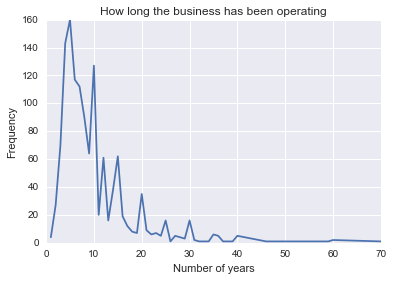

In [34]:
index = biz_age.index
plt.plot(index, biz_age.values)
plt.title('How long the business has been operating')
plt.xlabel('Number of years')
plt.ylabel('Frequency');

Alternatively we could plot a Cumulative distribution function. This shows, for a particular age of a business the percentage of businesses that have been operating for less than or eqaul to the same length of time.

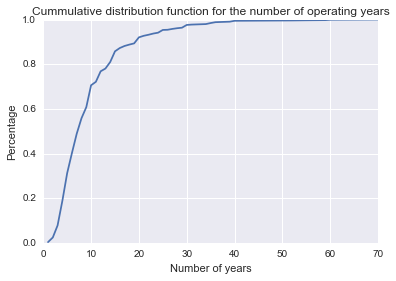

In [35]:
num = biz_age.sum()
cdf = biz_age.cumsum()/num
plt.plot(index, cdf)
plt.xlabel('Number of years')
plt.ylabel('Percentage')
plt.title('Cummulative distribution function for the number of operating years');

In addition to this we can plot the survival function. The survival function shows the likelihood that a business will end at at a particular age.

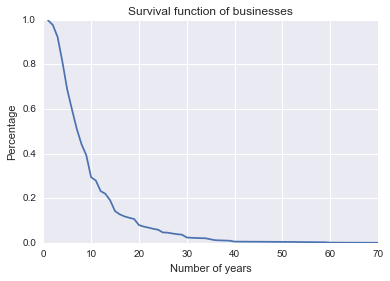

In [36]:
survival = 1 - cdf
plt.plot(index, survival.values)
plt.xlabel('Number of years')
plt.ylabel('Percentage')
plt.title('Survival function of businesses');

Finally we can plot the hazard function. The hazard function estimates the percentage of businesses that reach a certain age and end there.

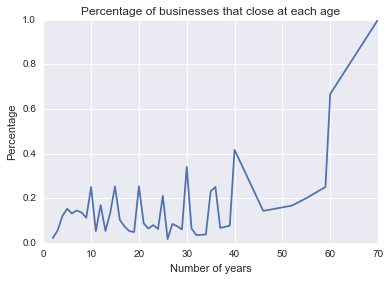

In [37]:
survival_list = survival.values.tolist()
lam =[]
for i in range(len(survival_list)-1):
    lam.append((survival_list[i]-survival_list[i+1])/float(survival_list[i]))

plt.plot(index[1:], lam)
plt.xlabel('Number of years')
plt.ylabel('Percentage')
plt.title('Percentage of businesses that close at each age');

Next we want to see the distribution of business ages across the country. We shall use a map for this and plot the different businesses in the survey. We shall use use circular markers, whose radius/size will indicate how long the business has lasted.

First we get the coordinates for each of the businesses. The most specific coordinate information we have is the disctrict so we shall use that to query the coordinated from google. For this we shall use the geocoder library. We create a new column called LatLng that has the coordinates of each of the businesses.

In [38]:
districts = sme['DISTRICT'].unique()
districts

array(['GULU', 'HOIMA', 'DOKOLO', 'RUKUNGIRI', 'NTUNGAMO', 'JINJA', 'LIRA',
       'WAKISO', 'KAMWENGE', 'KAMPALA', 'BUSHENYI', 'LUWERO', 'BUNDIBUGYO',
       'MBARARA', 'KABAROLE', 'KASESE', 'ARUA', 'MASAKA', 'KALANGALA',
       'MPIGI', 'NEBBI', 'BUIKWE', 'GOMBA', 'IGANGA', 'MUKONO', 'MBALE',
       'KIBOGA', 'LWENGO', 'MAYUGE', 'MASINDI', 'MITYANA', 'KOLE',
       'SHEEMA', 'BUSIA', 'IBANDA', 'BUTAMBALA', 'OYAM', 'APAC', 'BUGIRI',
       'SOROTI', 'NAKASEKE', 'KABALE', 'KYEGEGWA', 'KALUNGU', 'KISORO',
       'KYENJOJO', 'KIRYANDONGO', 'KIBAALE', 'RUBIRIZI', 'NAMUTUMBA',
       'BUTALEJA', 'TORORO', 'KANUNGU', 'KYANKWANZI', 'MUBENDE', 'RAKAI',
       'SEMBABULE', 'BUYENDE', 'SIRONKO', 'KAYUNGA', 'KIRUHURA', 'KAMULI',
       'AMOLATAR', 'BUDUDA', 'MARACHA', 'ISINGIRO', 'NTOROKO', 'BULIISA',
       'KITGUM', 'PADER', 'NAKASONGOLA'], dtype=object)

In [39]:
import geocoder
district_coords= {}
for district in districts:
    address = district + ', Uganda'
    district_coords[district]= geocoder.google(address).latlng

In [40]:
sme['LatLng'] = sme['DISTRICT'].map(district_coords)
sme[['DISTRICT', 'LatLng']].head()

,DISTRICT,LatLng
0,GULU,"[2.7724038, 32.2880726]"
1,GULU,"[2.7724038, 32.2880726]"
2,GULU,"[2.7724038, 32.2880726]"
3,GULU,"[2.7724038, 32.2880726]"
4,HOIMA,"[1.4273554, 31.3484448]"


In [41]:
import numpy as np
jitter = np.random.random(len(sme))*0.2
def add_jitter(x):
    jittered = [x[0]+ np.random.choice(jitter), x[1] + np.random.choice(jitter)]
    return jittered
sme['LatLngJ'] = sme['LatLng'].apply(add_jitter)
sme['LatLngJ'].head()

0    [2.95173767473, 32.4758647401]
1    [2.86265355178, 32.3853842571]
2    [2.91817569239, 32.3506949975]
3     [2.9110595524, 32.2885636745]
4    [1.59894377226, 31.4063485898]
Name: LatLngJ, dtype: object

We are now ready to plot these business locations on the map.

In [42]:
import folium

map_ug = folium.Map(location=[1.373333, 32.290275], zoom_start=7)
index= sme.index
for i in range(len(index)):
    folium.CircleMarker(location=sme['LatLngJ'].iloc[i], radius=sme['How long has the business been operating?'].iloc[i]/float(3),
                    popup=sme['DISTRICT'].iloc[i], color='#3186cc',
                    fill_color='#3186cc').add_to(map_ug)

map_ug

As we would prbably expect, the urban areas and major towns like Kampala, Wakiso and Fort Portal seem to have the most businesses and businesses here are relatively older than those in smaller towns like Rakai and Arua.

It is also noticeable that the survey did not include the North East of the country, unless there are no (small) businesses in the area, which is obviously not the case.

Next we can do some analysis based on gender.

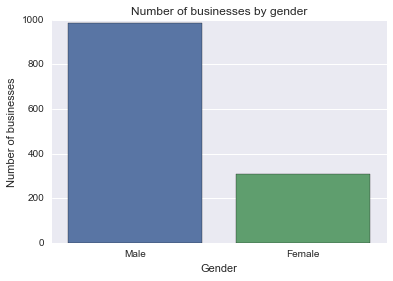

In [43]:
gender_count = sme['Gender of owner'].value_counts()
sns.barplot(x= gender_count.index, y = gender_count.values)
plt.xlabel('Gender')
plt.ylabel('Number of businesses')
plt.title('Number of businesses by gender');

In [44]:
gender_by_region = sme.groupby('REGION')['Gender of owner'].value_counts()
gender_by_region = gender_by_region.reset_index(level=['REGION'])
gender_by_region = gender_by_region.rename(columns={'Gender of owner':'Number'})
gender_by_region.reset_index(level=0, inplace=True)

In [45]:
gender_by_region

,Gender of owner,REGION,Number
0,Male,CENTRAL,327
1,Female,CENTRAL,116
2,Male,EASTERN,124
3,Female,EASTERN,42
4,Male,KAMPALA,159
5,Female,KAMPALA,48
6,Male,NORTHERN,113
7,Female,NORTHERN,43
8,Male,WESTERN,263
9,Female,WESTERN,60


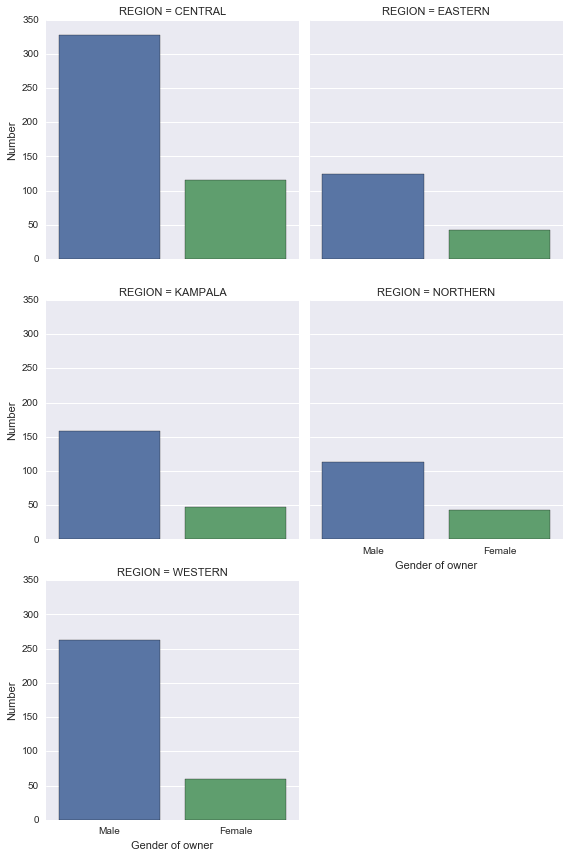

In [46]:
sns.factorplot(x="Gender of owner", y="Number",col="REGION",col_wrap=2, data=gender_by_region, kind="bar");

From the above we can see that there is no region where women are fully exposed to entrepreneurship. In all these areas most of the businesses are owned by men.

We can also examine the size of businesses as determined by their total sales.

First we place the different sales into bins based on the percentiles.

In [47]:
cuts =pd.qcut(sme['Firms total sales'], 10).unique().sort_values()
bins={}
for i, spread in enumerate(cuts):
    bins[spread]= i+1
sme['Binned Sales'] = pd.qcut(sme['Firms total sales'], 10)

In [48]:
sme['Sales Category']= sme['Binned Sales'].map(bins)

In [49]:
sme[['Sales Category','Binned Sales']].ix[:10]

,Sales Category,Binned Sales
0,3,"(350000, 500000]"
1,9,"(4000000, 10000000]"
2,9,"(4000000, 10000000]"
3,7,"(1500000, 2.16e+06]"
4,5,"(700000, 1000000]"
5,5,"(700000, 1000000]"
6,5,"(700000, 1000000]"
7,1,"[0, 200000]"
8,5,"(700000, 1000000]"
9,9,"(4000000, 10000000]"


The table above shows a preview of the bins used and the correspnding carhories that we are using. The categories range from 1 to 10.

In the analysis first we shall look at the sales by area.

In [50]:
sales_by_region= sme[['DISTRICT','REGION', 'Gender of owner', 'Firms total sales']].groupby('REGION')

In [51]:
region_sales = sales_by_region['Firms total sales'].median()
region_sales

REGION
CENTRAL      900000.0
EASTERN     1100000.0
KAMPALA     1120000.0
NORTHERN     900000.0
WESTERN     1000000.0
Name: Firms total sales, dtype: float64

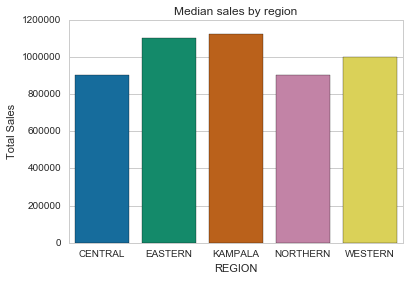

In [52]:

with sns.axes_style(style='whitegrid'):
    sns.barplot(x=region_sales.index, y= region_sales.values, palette='colorblind')
    plt.title('Median sales by region')
    plt.ylabel('Total Sales')

We can then create a map that shows the sizes of businesses based on their total sales. The circle marker size indicates the size of the business.

In [53]:
map_ug2 = folium.Map(location=[1.373333, 32.290275], zoom_start=7)
index= sme.index
for i in range(len(index)):
    folium.CircleMarker(location=sme['LatLngJ'].iloc[i], radius=sme['Sales Category'].iloc[i],
                    popup=sme['DISTRICT'].iloc[i], color='#3186cc',
                    fill_color='#3186cc').add_to(map_ug2)

map_ug2

Again as expected, the larger businesses are mainly around the major towns. A large number of the larger businesses can be seen in the central region and the other areas with many relatively larger businesses are the other major towns like Fort Portal, Mbarara and Mbale.